# Author: Ashmita Mukherjee

# GRIP @The Spark Foundation

# Data Science and Business Analytics Internship

### Batch: July, 2024

## Task1: Prediction using Supervised Machine Learning

## To predict the percentage of the student based on the number of study hours

### Importing libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import pickle

### Loading dataset

In [12]:
df = pd.read_csv('data.csv')

In [13]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Dataset description

Input variable: Hours

Output variables: scores

### Exploratort Data Analysis

In [14]:
#dimension of the dataframe
df.shape

(25, 2)

In [15]:
#description of statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
#summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [17]:
#datatypes of each coloumn
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [21]:
#unique values present in target coloumn
df['Scores'].unique()

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86], dtype=int64)

In [22]:
#unique values present
df['Hours'].unique()

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

### Check for missing values

In [25]:
df.isnull()
df.isnull().sum

<bound method DataFrame.sum of     Hours  Scores
0   False   False
1   False   False
2   False   False
3   False   False
4   False   False
5   False   False
6   False   False
7   False   False
8   False   False
9   False   False
10  False   False
11  False   False
12  False   False
13  False   False
14  False   False
15  False   False
16  False   False
17  False   False
18  False   False
19  False   False
20  False   False
21  False   False
22  False   False
23  False   False
24  False   False>

### Check for duplicate values

In [24]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

### Data Visualization

C:\Users\ashmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


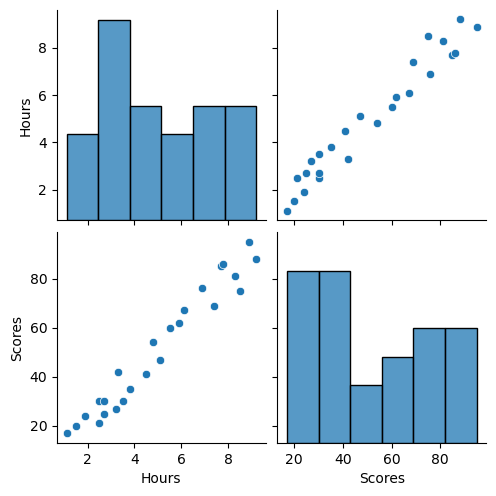

In [26]:
#visualize the data
sns.pairplot(df)

### Boxplot to check outliers

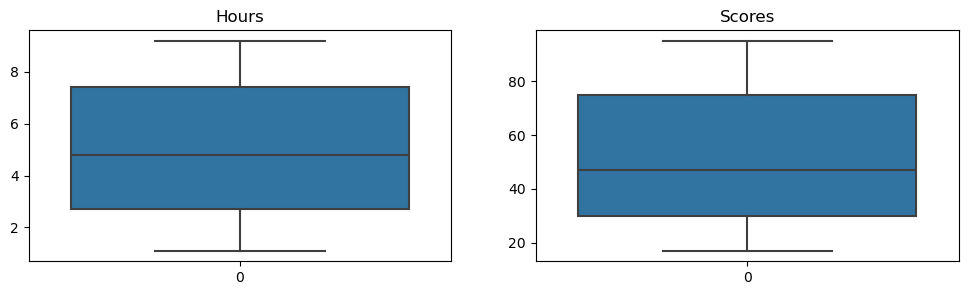

In [27]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.boxplot(df['Hours'])
plt.title('Hours')

plt.subplot(1,2,2)
sns.boxplot(df['Scores'])
plt.title('Scores')
plt.show()

No outliers

C:\Users\ashmi\AppData\Local\Temp\ipykernel_5648\18848517.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Hours)
C:\Users\ashmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashmi\AppData\Local\Temp\ipykernel_5648\18848517.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hist

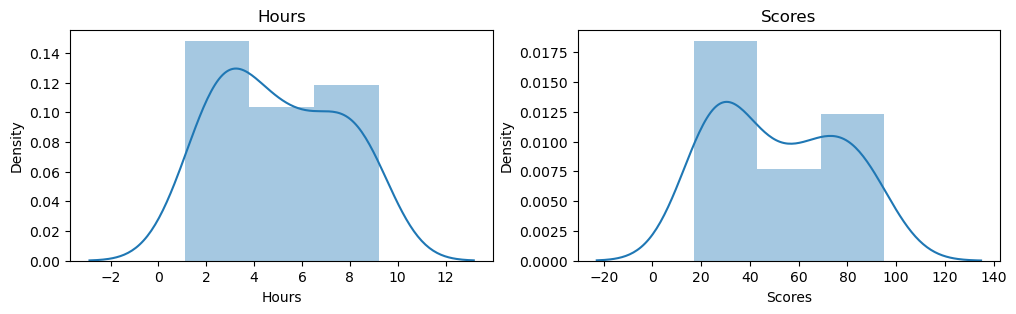

In [28]:
# Normality assumption checks
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.distplot(df.Hours)
plt.title('Hours')

plt.subplot(1,2,2)
sns.distplot(df.Scores)
plt.title('Scores')
plt.show()

Follows Normal distribution

### Histogram plot

C:\Users\ashmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


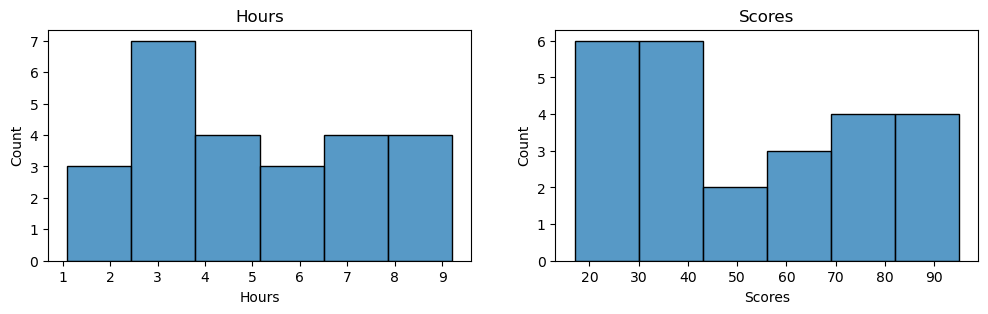

In [29]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.histplot(df['Hours'])
plt.title('Hours')

plt.subplot(1,2,2)
sns.histplot(df['Scores'])
plt.title('Scores')
plt.show()

### Correlation metrics

In [30]:
correlation = df.corr()

<Axes: >

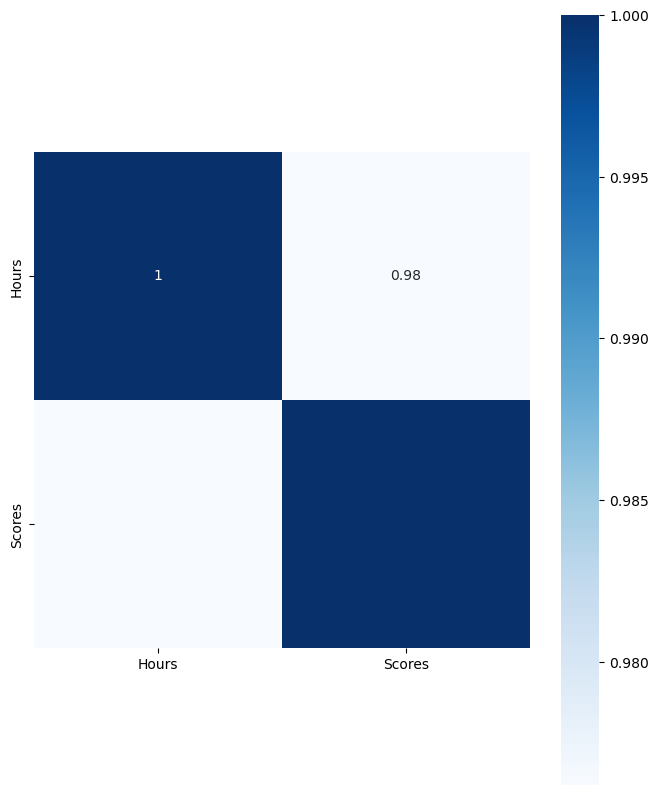

In [31]:
fig = plt.subplots(figsize = (8,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues')

Highly correlated

### Plotting the distribution of scores

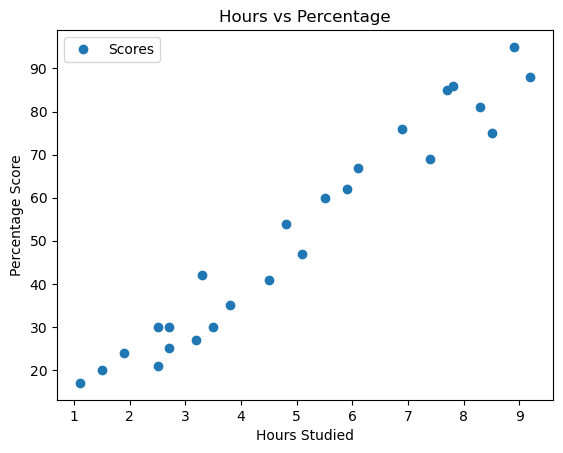

In [32]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

There is a positive linear relation between number of hours studied and percentage of scores

<Axes: ylabel='Scores'>

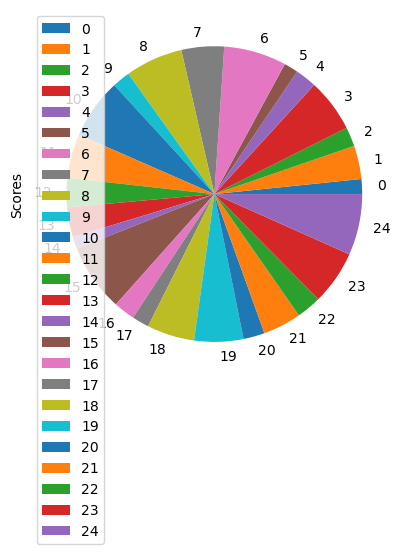

In [33]:
#pie chart
df.plot.pie(x='Hours', y='Scores')

<Axes: xlabel='Hours'>

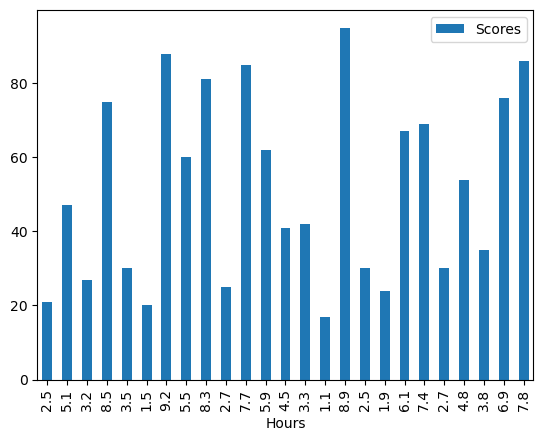

In [34]:
#bar plot
df.plot.bar(x='Hours', y='Scores')

### Data preprocessing

In [35]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

we have our attributes and labels

### Splitting the data

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

### Training the Algorithm

In [42]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('Training complete.')

Training complete.


In [40]:
#coefficient
regressor.coef_

array([9.68207815])

In [41]:
#intercept
regressor.intercept_

2.826892353899737

### Plotting the regression line

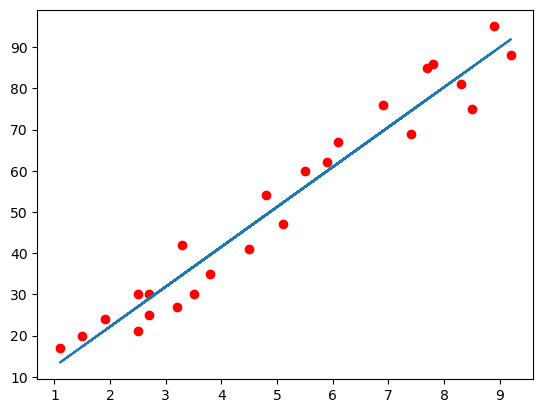

In [43]:
line = regressor.coef_*x+regressor.intercept_

plt.scatter(x, y,color='red')
plt.plot(x, line);
plt.show()

In [44]:
#training score
training_score = round(regressor.score(x_train, y_train)*100,2)
training_score

94.91

### Predictions

In [45]:
#testing data - in hours
print(x_test)
# predicting the scores
y_pred = regressor.predict(x_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


### Accuracy of the model

In [46]:
test_score = round(regressor.score(x_test, y_test)*100,2)
test_score

96.78

In [47]:
r2_score(y_test,y_pred)

0.9678055545167994

It has 96.78% accuracy

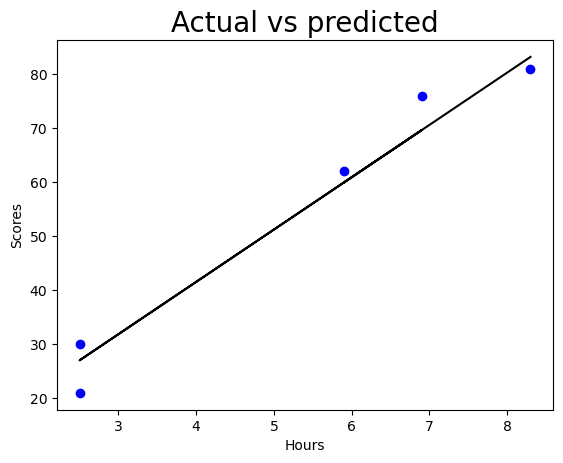

In [49]:
plt.scatter(x=x_test,y=y_test,color='blue')
plt.plot(x_test,y_pred,color='black')
plt.title('Actual vs predicted', size= 20)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Evaluating the model

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',rmse)

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


Lower MAE implies the model's predicted values are close to the actual ones.

### Comapring Actual vs Predicted

In [51]:
df1 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Variance':y_test-y_pred})
df1.head()

,Actual,Predicted,Variance
0,81,83.188141,-2.188141
1,30,27.032088,2.967912
2,21,27.032088,-6.032088
3,76,69.633232,6.366768
4,62,59.951153,2.048847


<Axes: >

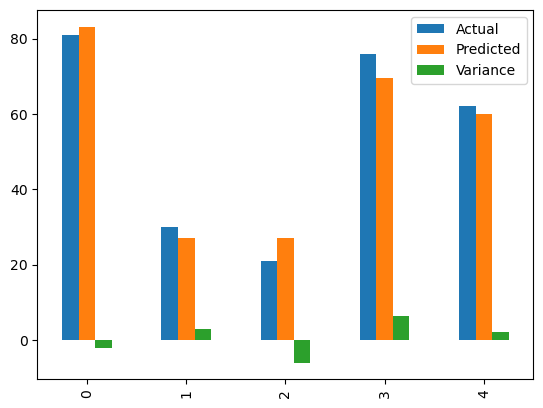

In [52]:
#plot a graph
df1.plot(kind='bar')

### What will be the predicted score if a student studied 9.25hrs/day/?

In [55]:
hours = [[9.25]]
pred = regressor.predict(hours)
print('No of Hours = {}'.format(hours))
print('Predicted Score = {}'.format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.38611528261494


### The student is likely to score 92.38%

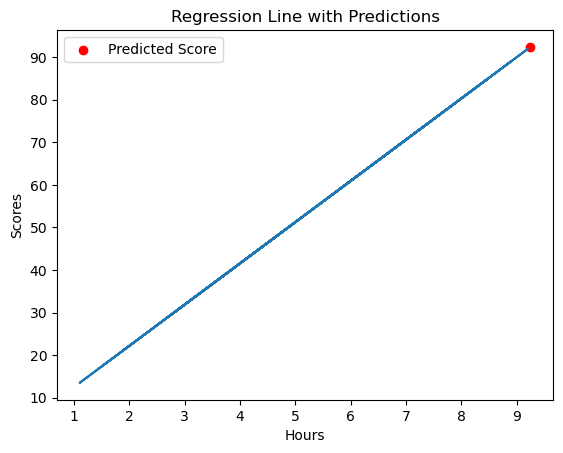

In [56]:
plt.scatter(9.25,pred,color='red', label='Predicted Score')
plt.plot(x, line);
plt.title('Regression Line with Predictions')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()

plt.show()